## importing packages
---

In [17]:
import keras
import numpy as np
import pandas as pd
from matplotlib import cm, patches
import matplotlib.pyplot as plt
import pydicom as dicom
import os
import tensorflow as tf

## Load in images
---

In [109]:
#Path = r'C:\Users\sandr\Documents\DnnProject\Project\stage_1_train_images\Pneumonia'
Path = r'C:\Users\sandr\Documents\Skola\Dnnproject\DnnProject\Project\Training set stage 1\Pneumonia'
lstFilesDCM = []  # create an empty list

for dirName, subdirList, fileList in os.walk(Path):
    for filename in fileList:
        if ".dcm" in filename.lower():  # check whether the file's DICOM
            lstFilesDCM.append(os.path.join(dirName,filename))

In [110]:
# Get ref file
RefDs = dicom.read_file(lstFilesDCM[0])

# Load dimensions based on the number of rows, columns, and slices (along the Z axis)
ConstPixelDims = (int(RefDs.Rows), int(RefDs.Columns), 5)#len(lstFilesDCM))

# Load spacing values (in mm)
ConstPixelSpacing = (float(RefDs.PixelSpacing[0]), float(RefDs.PixelSpacing[1]))#, float(RefDs.SliceThickness))
print

In [114]:
x = np.arange(0.0, (ConstPixelDims[0]+1)*ConstPixelSpacing[0], ConstPixelSpacing[0])
y = np.arange(0.0, (ConstPixelDims[1]+1)*ConstPixelSpacing[1], ConstPixelSpacing[1])
print(max(x),max(y))

142.336 142.336


In [72]:
# The array is sized based on 'ConstPixelDims'
df = pd.read_csv(r'C:\Users\sandr\Documents\Skola\Dnnproject\DnnProject\Project\stage_1_train_labels.csv')
ArrayDicom = np.zeros(ConstPixelDims, dtype=RefDs.pixel_array.dtype)
dict_pos = {'x':[],'y':[],'width':[],'height':[], 'index':[]}

# loop through all the DICOM files
for filenameDCM in lstFilesDCM[:5]:
    num_boxes = len(df[df['patientId']==filenameDCM[-40:-4]]['x'])
    # read the file
    ds = dicom.read_file(filenameDCM)
    # store the raw image data
    ArrayDicom[:, :, lstFilesDCM.index(filenameDCM)] = ds.pixel_array  
    [dict_pos['x'].append(df[df['patientId']==filenameDCM[-40:-4]]['x'].tolist()[i]) for i in range(num_boxes)]
    [dict_pos['y'].append(df[df['patientId']==filenameDCM[-40:-4]]['y'].tolist()[i]) for i in range(num_boxes)]
    [dict_pos['width'].append(df[df['patientId']==filenameDCM[-40:-4]]['width'].tolist()[i]) for i in range(num_boxes)]
    [dict_pos['height'].append(df[df['patientId']==filenameDCM[-40:-4]]['height'].tolist()[i]) for i in range(num_boxes)]
    [dict_pos['index'].append(lstFilesDCM.index(filenameDCM)) for _ in range(num_boxes) ]
print(dict_pos['index'])

[0, 0, 1, 1, 2, 2, 3, 3, 4, 4]


Rectangle(xy=(25.1345, 46.5196), width=28.6061, height=70.2654, angle=0)
Rectangle(xy=(79.2916, 38.0488), width=31.9388, height=66.0994, angle=0)
       x      y  width  height  index
8  181.0  184.0  206.0   506.0      4
9  571.0  275.0  230.0   476.0      4


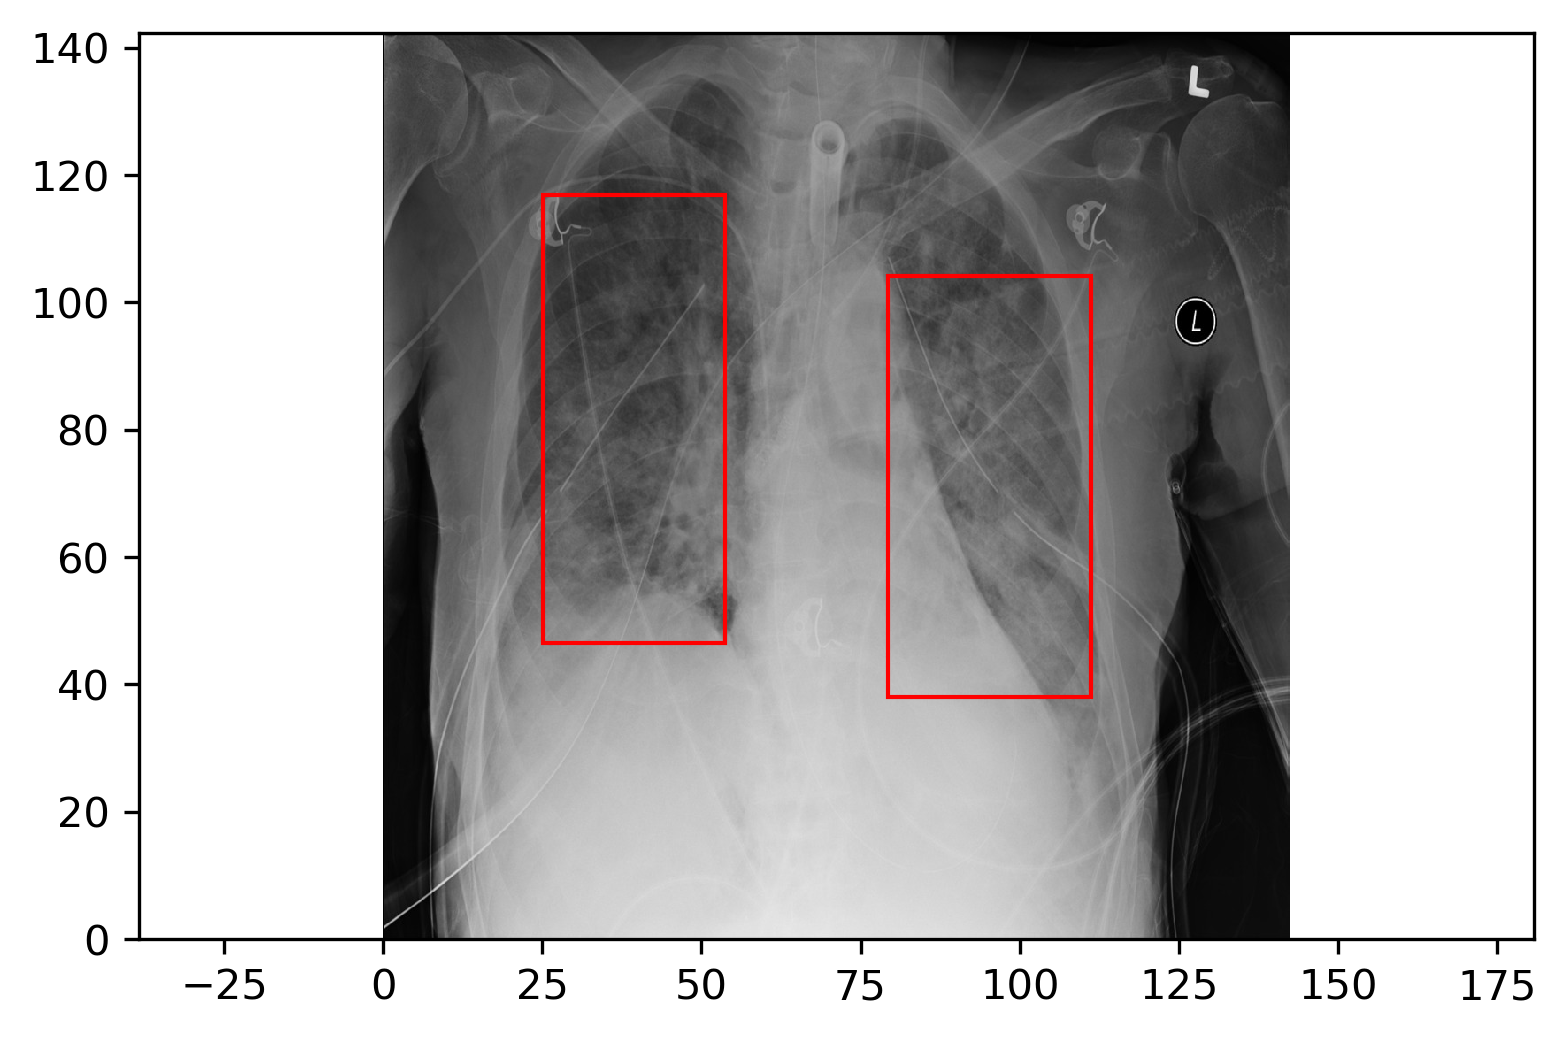

In [125]:
df_pos = pd.DataFrame.from_dict(dict_pos)
index = 4
fig1, ax = plt.subplots(dpi=300)
scale = 142.336/1025
#pyplot.set_cmap(pyplot.gray())
ax.pcolormesh(x,y, np.flipud(ArrayDicom[:, :, index]))
df_subset = df_pos[df_pos['index'] == index]
for i in range(len(df_subset)):
    rect = patches.Rectangle((df_subset['x'].tolist()[i]*scale,
                              142.336 - df_subset['y'].tolist()[i]*scale- df_subset['height'].tolist()[i]*scale),
                             df_subset['width'].tolist()[i]*scale,
                             df_subset['height'].tolist()[i]*scale,
                             linewidth=1,edgecolor='r',facecolor='none')
    print(rect)
    ax.add_patch(rect)
ax.set_aspect('equal', 'datalim')
# Add the patch to the Axes
print(df_subset)

[<tf.Tensor 'strided_slice_8:0' shape=(256, 256) dtype=float32>]


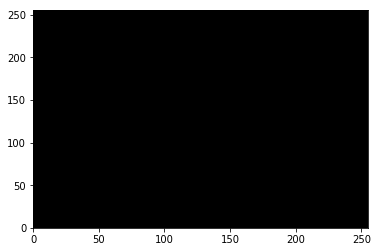

In [28]:

size_hight = 256
size_width = 256
fig2, ax1 = plt.subplots()
rgb_rezise = tf.image.resize_images(
    np.flipud(np.reshape(ArrayDicom[:, :, 2],[1024,1024,1])),
    [size_hight, size_width],
    align_corners=False,
    preserve_aspect_ratio=False
)
print([rgb_rezise[:,:,0]])
ax1.pcolormesh(np.arange(0, size_hight), np.arange(0, size_width), tf.Session().run(rgb_rezise[:,:,0]))